In [1]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import utils

In [2]:
ga = utils.load_var("FSH", "month_1", "lnd", extract="area").isel(member=0).fillna(0)
lf = utils.load_var("FSH", "month_1", "lnd", extract="landfrac").isel(member=0).fillna(0)
la = lf * ga

da = utils.load_var("FSH", "month_1", "lnd", stream="h0")

In [3]:
x = da.weighted(la).mean(dim=["lat","lon"]).groupby("time.year").mean().mean(dim="year")

In [4]:
sorted_members = x.sortby(x).load()

In [9]:
member_id_map = utils.load_member_id_map()
inverted = utils.invert_member_id_map(member_id_map)

In [14]:
for m in sorted_members.member:
    print(inverted[m.item()])

('10', 'medlynslope', 'max')
('14', 'Jmaxb0', 'max')
('21', 'leafcn', 'min')
('16', 'kmax', 'max')
('1', 'dleaf', 'min')
('12', 'medlynintercept', 'max')
('8', 'fff', 'max')
('3', 'd_max', 'min')
('28', 'ACCLIM_SF', 'max')
('25', 'KCN', 'min')
('18', 'psi50', 'max')
('20', 'FUN_fracfixers', 'max')
('27', 'ACCLIM_SF', 'min')
('24', 'lmrha', 'max')
('6', 'maximum_leaf_wetted_fraction', 'max')
('0', 'default', 'default')
('2', 'dleaf', 'max')
('11', 'medlynintercept', 'min')
('5', 'maximum_leaf_wetted_fraction', 'min')
('19', 'FUN_fracfixers', 'min')
('23', 'lmrha', 'min')
('17', 'psi50', 'min')
('22', 'leafcn', 'max')
('26', 'KCN', 'max')
('15', 'kmax', 'min')
('7', 'fff', 'min')
('13', 'Jmaxb0', 'min')
('4', 'd_max', 'max')
('9', 'medlynslope', 'min')


In [18]:
for m in x.member:
    print(inverted[m.item()][1])

default
dleaf
dleaf
d_max
d_max
maximum_leaf_wetted_fraction
maximum_leaf_wetted_fraction
fff
fff
medlynslope
medlynslope
medlynintercept
medlynintercept
Jmaxb0
Jmaxb0
kmax
kmax
psi50
psi50
FUN_fracfixers
FUN_fracfixers
leafcn
leafcn
lmrha
lmrha
KCN
KCN
ACCLIM_SF
ACCLIM_SF


In [104]:
lnd_vars = [
    "EFLX_LH_TOT", "FCTR", "FCEV", "FGEV",
    # "TLAI", "GSSUNLN",
]

atm_vars = [
    # "PRECC", "PRECL", "LHFLX",
    "TREFHT",
    # "U850", "V850",
]

output = {}

for v in lnd_vars:
    print(v)
    output[v] = utils.load_var(v, "month_1", "lnd", stream="h0")

for v in atm_vars:
    print(v)
    if "850" in v:
        output[v] = utils.load_var(v, "month_1", "atm", stream="h1")
    else:
        output[v] = utils.load_var(v, "month_1", "atm", stream="h0")

la = utils.load_var("EFLX_LH_TOT", "month_1", "lnd", extract="area").isel(member=0).fillna(0)

EFLX_LH_TOT
FCTR
FCEV
FGEV
TREFHT


In [ ]:
tavg_last20yr = {}
for v, da in output.items():
    tavg_last20yr[v] = da.isel(time=slice(-20*12, None)).groupby("time.year").mean().mean(dim="year")

In [101]:
da

<xarray.DataArray 'EFLX_LH_TOT' (member: 1, time: 780, lat: 96, lon: 144)> Size: 43MB
dask.array<getitem, shape=(1, 780, 96, 144), dtype=float32, chunksize=(1, 1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 384B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * time     (time) object 6kB 1950-01-01 00:00:00 ... 2014-12-01 00:00:00
  * member   (member) int64 8B 0
Attributes:
    long_name:     total latent heat flux [+ to atm]
    units:         W/m^2
    cell_methods:  time: mean

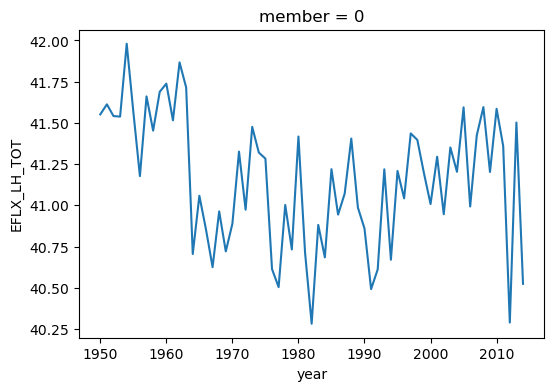

In [105]:
da = output["EFLX_LH_TOT"].isel(member=slice(0, 1))

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for m in da.member:
    da.sel(member=m).weighted(la).mean(dim=["lat","lon"]).groupby("time.year").mean().plot(ax=ax)

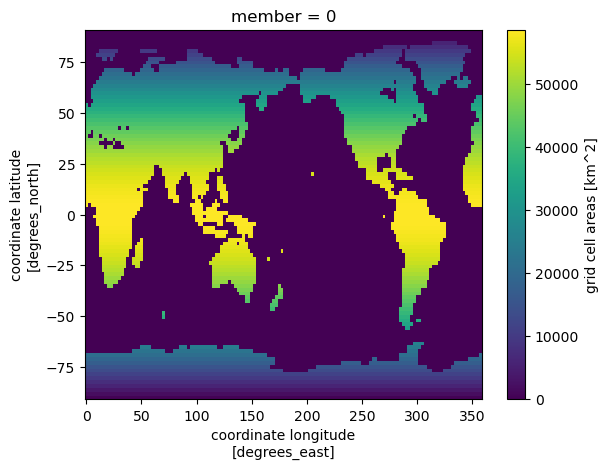

In [112]:
utils.load_var("FSH", "month_1", "lnd", extract="area").isel(member=0).fillna(0).plot()

In [ ]:
da = tavg_last20yr["EFLX_LH_TOT"].sel(member=slice(1, None)) - tavg_last20yr["EFLX_LH_TOT"].sel(member=0)
da = da.load()

/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [ ]:
fig, axes = plt.subplots(4, 5)
ax = axes.flatten()
for i, a in enumerate(ax):
    a.set_title(i)
fig.tight_layout()

In [ ]:
def panel_plot(da, dim, cmap, label, ncol=5, figsize=(14,10), vmin=None, vmax=None, center=True, robust=True, projection=ccrs.Robinson()):
    n = len(da[dim])
    if projection:
        transform = ccrs.PlateCarree()
    else:
        transform = None

    vabs = None
    if vmin and vmax and center:
        vabs = max([abs(vmin), abs(vmax)])
    elif (vmin or vmax) and center:
        vabs = vmin or vmax
    elif vmin is None and not robust:
        vmin = da.min().values
    elif vmax is None and not robust:
        vmax = da.max().values
    elif robust:
        vabs = max(abs(da.quantile(0.01)), abs(da.quantile(0.98)))

    nrow = n // ncol + 1

    fig = plt.figure(figsize=figsize)
    gs = mpl.gridspec.GridSpec(nrows=nrow+1, ncols=ncol, figure=fig)

    ax = []
    for i in range(n):
        ax.append(fig.add_subplot(gs[i], projection=projection))
    
    axleg = fig.add_subplot(gs[nrow*ncol:])

    for i, x in enumerate(da[dim]):
        if not vabs:
            ax[i].pcolormesh(da.lon, da.lat, da.sel({dim: x}), cmap=cmap, transform=transform, vmin=vmin, vmax=vmax)
        if vabs:
            ax[i].pcolormesh(da.lon, da.lat, da.sel({dim: x}), cmap=cmap, transform=transform, vmin=-vabs, vmax=vabs)
        ax[i].coastlines(color="k", lw=0.8)
        ax[i].set_title(utils.get_member_name(x.item()), fontsize=8)

    if vabs:
        cbar = fig.colorbar(
            mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-vabs, vmax=vabs), cmap=cmap),
            fraction=0.0225, cax=axleg, orientation='horizontal')
    else:
        cbar = fig.colorbar(
            mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cmap),
            fraction=0.0225, cax=axleg, orientation='horizontal')
    
    fig.tight_layout()


In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

def panel_plot_facetgrid_robust(
    da: xr.DataArray,
    dim: str,
    cmap,
    label: str,
    ncol: int = 5,
    figsize=(14, 10),
    vmin=None,
    vmax=None,
    robust: bool = True,
    projection=ccrs.Robinson(),
    center: bool = False,
    # axis-label behavior:
    show_outer_labels: bool = False,
    xlabel: str | None = None,
    ylabel: str | None = None,
    # compact colorbar placement (figure coords):
    cbar_rect=(0.25, 0.05, 0.50, 0.02),  # (left, bottom, width, height)
    hspace: float = 0.25,  # vertical spacing between subplots
):
    """
    Faceted map panels with an independent, compact colorbar.

    Parameters
    ----------
    da : xr.DataArray
        Must be at least 2D over lon/lat and have coordinate `dim` for faceting.
    dim : str
        Dimension name to facet over (columns and wrapped rows).
    cmap : matplotlib colormap
        Colormap for pcolormesh.
    label : str
        Colorbar label.
    ncol : int
        Number of facet columns (via col_wrap).
    figsize : tuple
        Figure size in inches.
    vmin, vmax : float or None
        Passed through to xarray. If None and robust=True, xarray chooses limits.
    robust : bool
        If True and vmin/vmax are None, xarray uses percentile-based limits.
    projection : cartopy.crs or None
        Map projection for subplots.
    center : bool
        If True, enforce symmetric limits about zero *after* xarray picks limits.
        Note: this overrides strict “xarray robust” symmetry; it uses the robust
        limits then symmetrizes them.
    show_outer_labels : bool
        If True, only show x/y labels on the outer edge panels; else remove all.
    xlabel, ylabel : str or None
        Optional axis labels for the outer panels if show_outer_labels=True.
    cbar_rect : tuple
        Figure coords for colorbar axes: (left, bottom, width, height).
    hspace : float
        Vertical spacing between subplot rows (default: 0.25).

    Returns
    -------
    fg : xarray.plot.FacetGrid
    """
    if projection:
        transform = ccrs.PlateCarree()
        subplot_kws = {"projection": projection}
    else:
        transform = None
        subplot_kws = None

    # --- create facets without xarray colorbar ---
    fg = da.plot.pcolormesh(
        col=dim,
        col_wrap=ncol,
        cmap=cmap,
        transform=transform,
        subplot_kws=subplot_kws,
        vmin=vmin,
        vmax=vmax,
        robust=robust,
        add_colorbar=False,
        # xarray sometimes adds per-panel labels depending on x/y inference; we handle after
    )

    fig = fg.fig
    fig.set_size_inches(*figsize)

    # --- collect valid axes in row-major order ---
    axes = [ax for ax in fg.axes.ravel() if ax is not None]
    names = [name for name in fg.name_dicts.ravel() if name is not None]

    # --- add coastlines + custom titles ---
    for ax, nd in zip(axes, names):
        if projection:
            ax.coastlines(color="k", lw=0.8)

        print(nd)
        val = nd[dim]
        try:
            val_item = val.item()
        except Exception:
            val_item = val
        ax.set_title(utils.get_member_name(val_item), fontsize=8)

    # --- find the mappable xarray actually drew (for correct norm/limits) ---
    # For pcolormesh, the QuadMesh is typically stored in ax.collections[0].
    # We search robustly across axes for the first collection.
    mappable = None
    for ax in axes:
        if getattr(ax, "collections", None):
            if len(ax.collections) > 0:
                mappable = ax.collections[0]
                break
    if mappable is None:
        raise RuntimeError("Could not find a QuadMesh mappable on facet axes.")

    # --- optional: enforce symmetric about zero using the chosen limits ---
    # This keeps xarray robust scaling but makes it centered.
    if center:
        vmin_x, vmax_x = mappable.norm.vmin, mappable.norm.vmax
        vabs = max(abs(vmin_x), abs(vmax_x))
        mappable.set_norm(mpl.colors.Normalize(vmin=-vabs, vmax=vabs))

    # --- axis label handling ---
    # Strategy:
    # - Always remove per-panel x/y labels unless show_outer_labels=True.
    # - If show_outer_labels=True, keep labels only on left column and bottom row.
    # This avoids clutter in dense facet maps.
    if not show_outer_labels:
        for ax in axes:
            ax.set_xlabel("")
            ax.set_ylabel("")
    else:
        # Determine layout dimensions from fg.axes shape (may include None at end)
        nrows, ncols = fg.axes.shape

        # helper: map flat axes index -> (row, col) in the original grid
        # We must iterate over full grid (including None) to identify positions.
        for r in range(nrows):
            for c in range(ncols):
                ax = fg.axes[r, c]
                if ax is None:
                    continue

                is_left = (c == 0)
                is_bottom = (r == nrows - 1)

                # Clear everything first
                ax.set_xlabel("")
                ax.set_ylabel("")

                if is_bottom and (xlabel is not None):
                    ax.set_xlabel(xlabel)
                if is_left and (ylabel is not None):
                    ax.set_ylabel(ylabel)

    # --- layout + compact independent colorbar ---
    # Leave room at bottom for colorbar
    fig.tight_layout(pad=1.2, rect=[0, 0.10, 1, 1])
    fig.subplots_adjust(hspace=hspace)

    cax = fig.add_axes(list(cbar_rect))
    cbar = fig.colorbar(mappable, cax=cax, orientation="horizontal")
    cbar.set_label(label)

    return fg

/glade/derecho/scratch/bbuchovecky/tmp/ipykernel_44750/3521958302.py:91: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  axes = [ax for ax in fg.axes.ravel() if ax is not None]


{'member': np.int64(1)}
{'member': np.int64(2)}
{'member': np.int64(3)}
{'member': np.int64(4)}
{'member': np.int64(5)}
{'member': np.int64(6)}
{'member': np.int64(7)}
{'member': np.int64(8)}
{'member': np.int64(9)}
{'member': np.int64(10)}
{'member': np.int64(11)}
{'member': np.int64(12)}
{'member': np.int64(13)}
{'member': np.int64(14)}
{'member': np.int64(15)}
{'member': np.int64(16)}
{'member': np.int64(17)}
{'member': np.int64(18)}
{'member': np.int64(19)}
{'member': np.int64(20)}
{'member': np.int64(21)}
{'member': np.int64(22)}
{'member': np.int64(23)}
{'member': np.int64(24)}
{'member': np.int64(25)}
{'member': np.int64(26)}
{'member': np.int64(27)}
{'member': np.int64(28)}


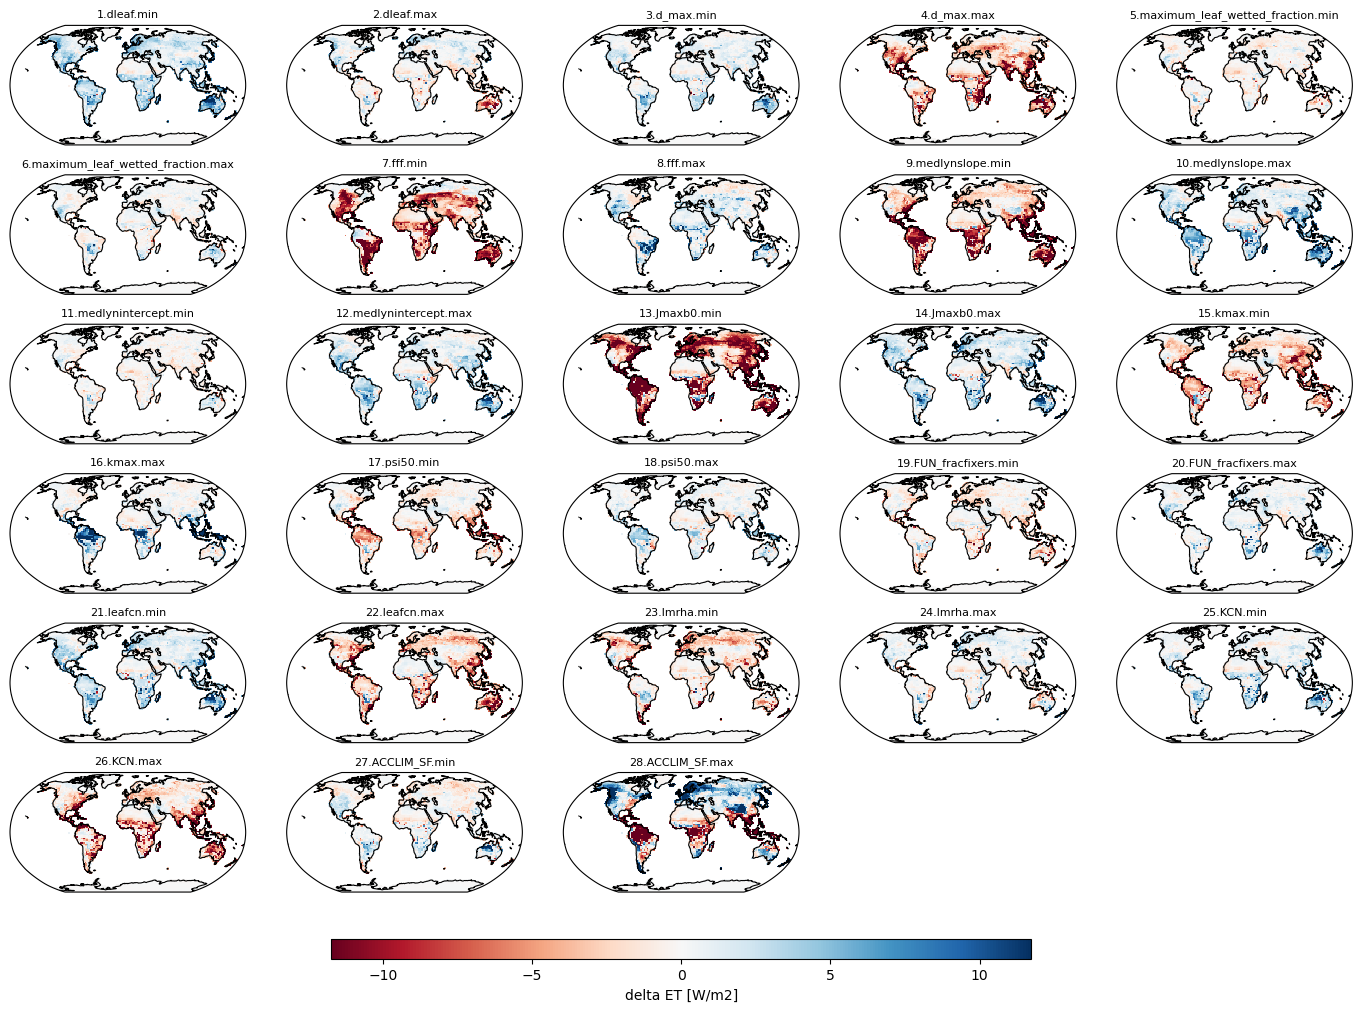

In [73]:
panel_plot_facetgrid_robust(da, dim="member", cmap="RdBu", label="delta ET [W/m2]");
plt.savefig("./fig/delta_et_panels.png", dpi=300)

In [ ]:
g = (
    tavg_last20yr["EFLX_LH_TOT"].sel(member=slice(1, None))
    - tavg_last20yr["EFLX_LH_TOT"].sel(member=0)
).plot.pcolormesh(
    figsize=(12, 10),
    col="member",
    col_wrap=5,
    robust=True,
    add_labels=False,
    subplot_kws={
        "ylabel": "latitude",
        "xlabel": "longitude",
    },
    cmap="PuOr"
)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(utils.get_member_info(i+1), fontsize=8)

In [95]:
def geomap(da, projection=ccrs.Robinson(), subplot_kws={}, **kwargs):
    fg = da.plot.pcolormesh(
        transform=ccrs.PlateCarree(),
        subplot_kws={**{"projection": projection}, **subplot_kws},
        **kwargs)

    if isinstance(fg.axes, np.ndarray):
        axes = [ax for ax in fg.axes.ravel() if ax is not None]
    else:
        axes = [fg.axes]
    
    for ax in axes:
        ax.coastlines(color="k", lw=0.8)

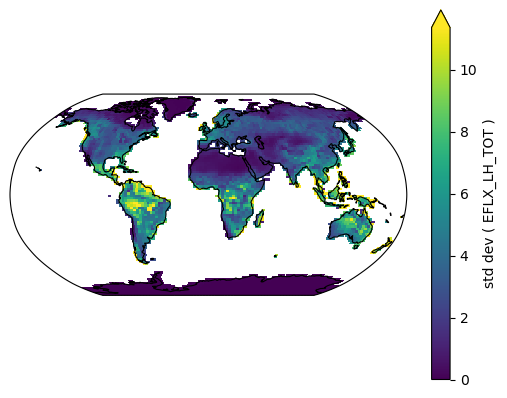

In [96]:
geomap(
    tavg_last20yr["EFLX_LH_TOT"].std(dim="member"), 
    robust=True,
    vmin=0,
    cbar_kwargs={"label": "std dev ( EFLX_LH_TOT ) [W/m2]"}
)

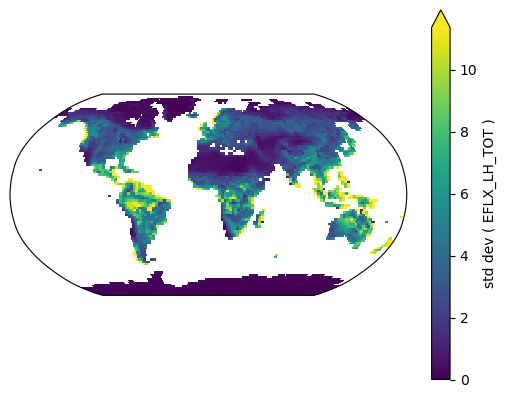

In [75]:
tavg_last20yr["EFLX_LH_TOT"].std(dim="member").plot(
    robust=True,
    vmin=0,
    cbar_kwargs={"label": "std dev ( EFLX_LH_TOT )"},
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.Robinson()},
    cmap="")